###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [1]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

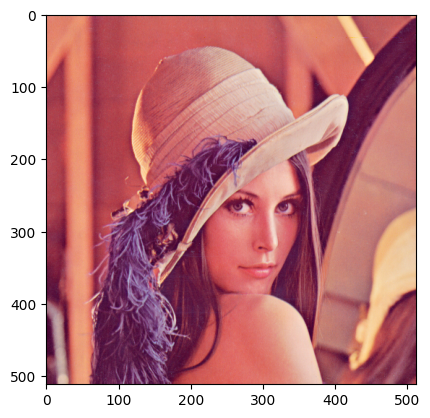

In [2]:
image = plt.imread("lena.png")
plt.imshow(image)
# print(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [3]:
height, width, channel = image.shape
print("h = ", height)
print("w = ", width)
print("c = ", channel)

h =  512
w =  512
c =  3


In [4]:
# Determine the type of image
if channel == 3:
    image_type = "RGB"
elif channel == 1:
    image_type = "Grayscale"
else:
    image_type = "Binary or Multi-channel"
    
    
# Calculate aspect ratio
aspect_ratio = width / height

# Print results
print(f"Number of channels: {channel}")
print(f"Image type: {image_type}")
print(f"Aspect ratio: {aspect_ratio:.2f}")

Number of channels: 3
Image type: RGB
Aspect ratio: 1.00


###### Task1.2:  Visualization of each channel

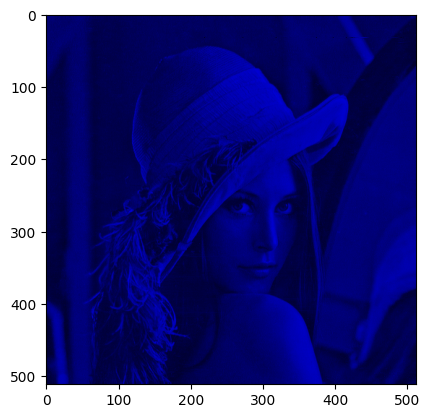

In [5]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here

    # Since Image is RGB
    output = np.zeros_like(image)
    # Set the specified channel in the output image
    output[:, :, channel] = image[:, :, channel]
    
    return output    # 'output' is image's particular channel values


plt.imshow(VisualizeChannel(image=image, channel=0)) # Red
plt.imshow(VisualizeChannel(image=image, channel=1)) # Green
plt.imshow(VisualizeChannel(image=image, channel=2)) # Blue

In [6]:
# Image is normalised, that's why max and min are between 0 and 1
imgg = image[:, :, 0] # 0 = Red
print(f'channel 0 => Red, max_intnesity = {np.max(imgg)}, min_intensity = {np.min(imgg)}')

imgg = image[:, :, 1] # 1 = Green
print(f'channel 1 => Green, max_intnesity = {np.max(imgg)}, min_intensity = {np.min(imgg)}')

imgg = image[:, :, 2] # 2 = Blue
print(f'channel 2 => Blue, max_intnesity = {np.max(imgg)}, min_intensity = {np.min(imgg)}')


channel 0 => Red, max_intnesity = 1.0, min_intensity = 0.21176470816135406
channel 1 => Green, max_intnesity = 0.9725490212440491, min_intensity = 0.0117647061124444
channel 2 => Blue, max_intnesity = 0.8823529481887817, min_intensity = 0.0313725508749485


# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

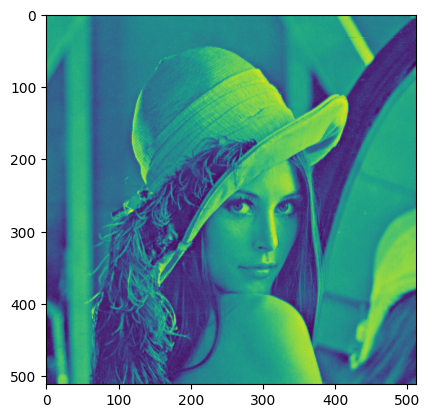

In [7]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = 0.3 * image[:, :, 0] + 0.3 * image[:, :, 1] + 0.3 * image[:, :, 2]

    return gray       #'gray' is grayscale image, converted from RGB image

image = plt.imread("lena.png")
plt.imshow(RGB2Gray(image=image))

###### Task2.2 : Gray to Binary

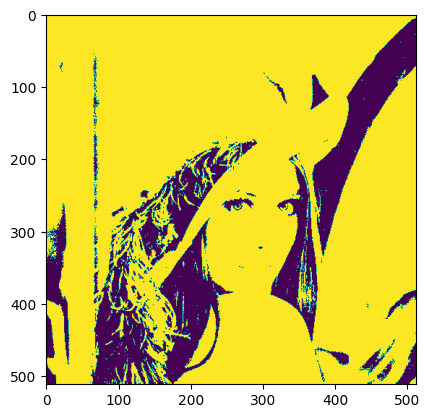

In [8]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray = RGB2Gray(image=image)


    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
        bimg = np.where(gray >= T, 1, 0)

    #write code to visualize the resultant image


        return bimg

image = plt.imread("lena.png")
plt.imshow(Gray2Binary(image=image, T=0.3))


######  Task2.3:  Crop a 5*5 section of a gray image

In [9]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    # Check if input is RGB and convert to grayscale if necessary
    if image.ndim == 3 and image.shape[2] == 3:  # RGB image
        image = RGB2Gray(image)  # Convert to grayscale


    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = image[r0:r0 + 5, c0:c0 + 5]

    # visualize patch and print its value

    return patch

[[0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]]


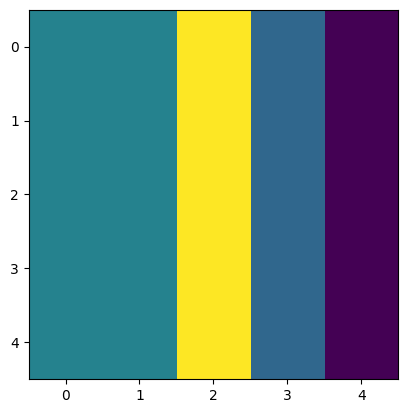

In [10]:
image = plt.imread("lena.png")
patch = ImageCrop(image,r0 = 0,c0 = 0)
print(patch)
plt.imshow(patch)

In [11]:
image = plt.imread("lena.png")
patch = ImageCrop(image,r0 = 0,c0 = 0)
print("patch = ", patch)

# 1] Multipying patch by 0.5
patch05 = patch * 0.5
print("patch05 = ", patch05)

# 2] Multiplying patch by 2
patch2 = patch * 2
print("patch2 = ", patch2)

# 3] create another random 5*5 patch (numpy array) and add/subtract it to the patch
random_patch = np.random.rand(5, 5)
print(patch * random_patch)

patch =  [[0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]
 [0.5741177  0.5741177  0.58000004 0.5729412  0.5694118 ]]
patch05 =  [[0.28705886 0.28705886 0.29000002 0.2864706  0.2847059 ]
 [0.28705886 0.28705886 0.29000002 0.2864706  0.2847059 ]
 [0.28705886 0.28705886 0.29000002 0.2864706  0.2847059 ]
 [0.28705886 0.28705886 0.29000002 0.2864706  0.2847059 ]
 [0.28705886 0.28705886 0.29000002 0.2864706  0.2847059 ]]
patch2 =  [[1.1482354 1.1482354 1.1600001 1.1458824 1.1388236]
 [1.1482354 1.1482354 1.1600001 1.1458824 1.1388236]
 [1.1482354 1.1482354 1.1600001 1.1458824 1.1388236]
 [1.1482354 1.1482354 1.1600001 1.1458824 1.1388236]
 [1.1482354 1.1482354 1.1600001 1.1458824 1.1388236]]
[[0.5478072  0.43074342 0.21672566 0.44296485 0.00898722]
 [0.2399972  0.18312491 0.44040094 0.46283619 0.24079164]
 [0.37

###### Task2.4: Uniform Brightness Scaling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


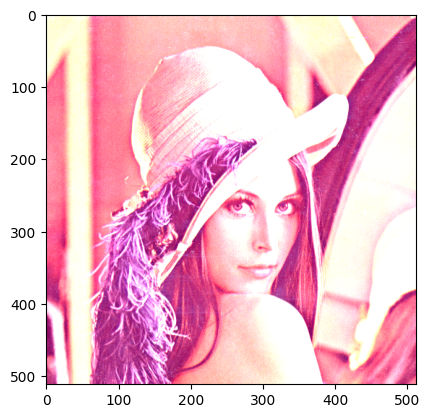

In [12]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here

    output = image * scale
    #display the resultant image

    return output        #replace output with the variable name you used for final result

image = plt.imread("lena.png")
plt.imshow(UniformBrightScaling(image=image, scale=2))


In [13]:
## Image normalization

# 3. Image Filtering

(512, 512, 3)


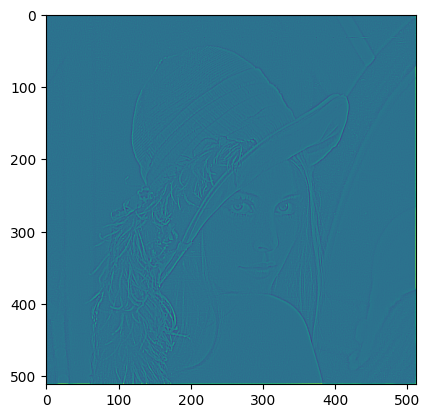

In [14]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        #write code to convert it to gray scale
        image = RGB2Gray(image=image)

    # image = RGB2Gray(image=image)
    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)
    r, c = image.shape
    output = np.zeros((r, c))

    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    pad_img = np.zeros((r + 2, c + 2))

    #now copy gray image to above created array at location starting from (1,1)
    pad_img[1:r + 1, 1:c + 1] = image

    #write code to convolve the image
    for row in range(r):     # use appropiate range values for row and col
        for col in range(c):
            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both (or directly take element wise multiplication and sum it)
            # store this scalar value to output matrix with starting location (0,0)         (alternatively one could also create a list and reshape it to output size)

            # Select the 3x3 patch with center at (row, col)
            patch = pad_img[row:row + 3, col:col + 3]
            # Perform element-wise multiplication and sum
            output[row, col] = np.sum(patch * kernel)


    plt.imshow(output)
    return output

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

image = plt.imread("lena.png")
print(image.shape)
# Extract features using the convolution operation
output_image = feature_extractor(image, kernel)

In [15]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


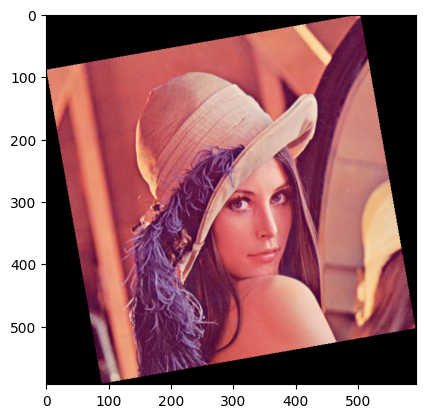

In [16]:
from scipy.ndimage import rotate
# Load the image
image = plt.imread("lena.png")

# Rotate the image by 10 degrees anticlockwise
rotated_image = rotate(image, angle=10, reshape=True)

plt.imshow(rotated_image)